<a href="https://colab.research.google.com/github/dbright123/Dbot-Advance/blob/main/lstm_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd





In [ ]:
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

trade_active = mt5.initialize()

print(trade_active)

if not trade_active:
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())

In [ ]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True or terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

In [ ]:
symbols = mt5.symbols_get()
print(len(symbols))
t_symbol = []
for symbol in symbols:
    if "USD" in symbol.name:
        print("Yes ", symbol.name)
        t_symbol.append(symbol.name)

print(len(t_symbol))

In [ ]:
market = mt5.copy_rates_from_pos(t_symbol[10], mt5.TIMEFRAME_M30, 0, 99999)
display(market)
print(market.shape)
print(t_symbol[10])
t_s = t_symbol[10]

data = []
for i in range(len(market)):
    data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
df = pd.DataFrame(data, columns=["open", "high","low", "close"])
df.to_csv("Generated"+t_s+" dbot.csv", index=False)


In [ ]:
test_symbol = []
for t_s in t_symbol:
    market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_H1, 0, 99999)
    if(len(market) > 80000 ):
        data = []
        for i in range(len(market)):
            data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
        df = pd.DataFrame(data, columns=["open", "high","low", "close"])
        df.to_csv("Generated"+t_s+" dbot.csv", index=False)
        test_symbol.append(t_s)


In [ ]:

for t_s in test_symbol:
    market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_D1, 0, 1000)
    if(len(market) > 900):
        data = []
        for i in range(len(market)):
            data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
        df = pd.DataFrame(data, columns=["open", "high","low", "close"])
        df.to_csv("Generated"+t_s+" test.csv", index=False)



In [ ]:
import joblib

joblib.dump(t_symbol,"symbol.joblib")

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
print(tf.__version__)


2.10.1


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scaler3d2d import preprocess_and_save_scalers,transform_data, inverse_transform_data



In [3]:
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt



from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import keras

In [4]:
# Get the list of all files and directories in the specified path

dir_contents = os.listdir(".")
t_symbol = joblib.load("symbol.joblib")

In [5]:
print(t_symbol)

['EURUSD', 'GBPUSD', 'USDJPY', 'USDCHF', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDMXN', 'USDZAR', 'XAGUSD', 'XAUUSD', 'XBRUSD', 'XTIUSD', 'XNGUSD', 'BTCUSD', 'ETHUSD', 'LTCUSD', 'XRPUSD', 'BCHUSD', 'AAVEUSD', 'ADAUSD', 'ALGOUSD', 'ATOMUSD', 'AVAXUSD', 'AXSUSD', 'BNBUSD', 'DASHUSD', 'DOGEUSD', 'DOTUSD', 'FILUSD', 'GRTUSD', 'ICPUSD', 'IOTAUSD', 'LINKUSD', 'LRCUSD', 'MANAUSD', 'NEARUSD', 'SOLUSD', 'UNIUSD', 'ZECUSD', 'ETCUSD', 'TRXUSD', 'FETUSD', 'ARBUSD', 'APTUSD', 'SUIUSD', 'USDDKK', 'USDCZK', 'USDHUF', 'USDNOK', 'USDPLN', 'USDSEK', 'USDSGD', 'USDHKD', 'USDCNH', 'USDTRY', 'XBRUSD.Daily', 'XTIUSD.Daily', 'BTCUSD.Daily', 'ETHUSD.Daily', 'XRPUSD.Daily', 'LTCUSD.Daily', 'BCHUSD.Daily', 'LINKUSD.Daily', 'SOLUSD.Daily']


In [ ]:
#t_symbol = ["EURUSD","AUDUSD","GBPUSD","USDCAD"]

In [6]:

# Filter the list to include only files, not directories
# os.path.join is used to create a full path for isfile() to check
files = [item for item in dir_contents]

file_target = []
test_target = []

for filename in files:
    for t_s in t_symbol:
        if t_s in filename  and "dbot.csv" in filename:
            print(filename)
            file_target.append(filename)
            test_target.append(filename.replace("dbot","test"))

print("----------------------------------------------------")

print(len(file_target))
print(len(test_target))
train_dfs = []
for f_t in file_target:
    train_dfs.append(pd.read_csv(f_t))
try:
    train_dfs_test = []
    for f_t in test_target:
        train_dfs_test.append(pd.read_csv(f_t))
except:
    pass

GeneratedAUDUSD dbot.csv
GeneratedEURUSD dbot.csv
GeneratedGBPUSD dbot.csv
GeneratedNZDUSD dbot.csv
GeneratedUSDCAD dbot.csv
GeneratedUSDCHF dbot.csv
GeneratedUSDJPY dbot.csv
GeneratedUSDMXN dbot.csv
GeneratedUSDZAR dbot.csv
GeneratedXAUUSD dbot.csv
----------------------------------------------------
10
10


In [ ]:
display(train_dfs[0])

In [ ]:
display(train_dfs_test[0])

In [ ]:
print(train_dfs[0].values[:,-1:])

In [7]:
def create_sequences(data_scaled, seq_len, pred_steps = 5):
    """
    data_scaled: np.array shaped (n_rows, n_features)
    returns X (n_samples, seq_len, n_features), y (n_samples, n_features)
    where y is the row immediately following the window.
    """
    X, y = [], []
    n_rows = data_scaled.shape[0]
    for i in range(n_rows - seq_len - pred_steps + 1):
        X.append(data_scaled[i:i+seq_len])
        y.append(data_scaled[i+seq_len : i + seq_len+pred_steps, -1])
    X = np.array(X)
    y = np.array(y)
    return X, y





In [34]:
n = 1

In [35]:

def preprocess_and_save_scalers(data_x, data_y, scaler_x_filename='scaler_x.joblib', scaler_y_filename='scaler_y.joblib'):
    """
    Preprocesses 3D X and 2D Y data, scales them to a range of [0, 1],
    and saves the fitted scalers.

    Args:
        data_x (np.ndarray): The input features, a 3D numpy array of shape (samples, timesteps, features).
        data_y (np.ndarray): The target values, a 2D numpy array of shape (samples, output_dim).
        scaler_x_filename (str): Filename to save the scaler for X data.
        scaler_y_filename (str): Filename to save the scaler for Y data.

    Returns:
        tuple: A tuple containing the scaled X data (3D) and scaled Y data (2D).
    """
    try:
        # --- Preprocess X data (3D) ---
        # Reshape 3D data to 2D for scaler
        original_shape_x = data_x.shape
        data_x_reshaped = data_x.reshape(-1, original_shape_x[2])

        # Initialize and fit the scaler for X
        scaler_x = MinMaxScaler(feature_range=(0, 1))
        scaled_x_reshaped = scaler_x.fit_transform(data_x_reshaped)

        # Reshape the scaled data back to its original 3D shape
        scaled_x = scaled_x_reshaped.reshape(original_shape_x)

        # --- Preprocess Y data (2D) ---
        scaler_y = MinMaxScaler(feature_range=(0, 1))
        scaled_y = scaler_y.fit_transform(data_y)

        # --- Save the scalers ---
        joblib.dump(scaler_x, scaler_x_filename)
        joblib.dump(scaler_y, scaler_y_filename)
        print(f"Scaler for X saved to '{scaler_x_filename}'")
        print(f"Scaler for Y saved to '{scaler_y_filename}'")

        return scaled_x, scaled_y

    except Exception as e:
        print(f"An error occurred during preprocessing: {e}")
        return None, None

def transform_data(data_x=None, data_y=None, scaler_x_filename='scaler_x.joblib', scaler_y_filename='scaler_y.joblib'):
    """
    Transforms new 3D X and/or 2D Y data using saved scalers.

    Args:
        data_x (np.ndarray, optional): The new input features (3D numpy array). Defaults to None.
        data_y (np.ndarray, optional): The new target values (2D numpy array). Defaults to None.
        scaler_x_filename (str): Filename of the saved scaler for X data.
        scaler_y_filename (str): Filename of the saved scaler for Y data.

    Returns:
        tuple: A tuple containing (scaled_x, scaled_y). Elements will be None if not provided.
    """
    scaled_x = None
    scaled_y = None

    # Transform X data if provided
    if data_x is not None:
        if not os.path.exists(scaler_x_filename):
            print(f"Error: Scaler file for X not found at '{scaler_x_filename}'")
        else:
            try:
                scaler_x = joblib.load(scaler_x_filename)
                original_shape_x = data_x.shape
                # Ensure there's data to reshape
                if original_shape_x[0] > 0:
                    data_x_reshaped = data_x.reshape(-1, original_shape_x[2])
                    scaled_x_reshaped = scaler_x.transform(data_x_reshaped)
                    scaled_x = scaled_x_reshaped.reshape(original_shape_x)
                else:
                    # Handle empty array case
                    scaled_x = np.array([]).reshape(original_shape_x)
            except Exception as e:
                print(f"An error occurred during X transformation: {e}")

    # Transform Y data if provided
    if data_y is not None:
        if not os.path.exists(scaler_y_filename):
            print(f"Error: Scaler file for Y not found at '{scaler_y_filename}'")
        else:
            try:
                scaler_y = joblib.load(scaler_y_filename)
                scaled_y = scaler_y.transform(data_y)
            except Exception as e:
                print(f"An error occurred during Y transformation: {e}")

    return scaled_x, scaled_y


def inverse_transform_data(scaled_x=None, scaled_y=None, scaler_x_filename='scaler_x.joblib', scaler_y_filename='scaler_y.joblib'):
    """
    Inverse transforms scaled 3D X and/or 2D Y data to their original scale.

    Args:
        scaled_x (np.ndarray, optional): The scaled input features (3D numpy array). Defaults to None.
        scaled_y (np.ndarray, optional): The scaled target values or predictions (2D numpy array). Defaults to None.
        scaler_x_filename (str): Filename of the saved scaler for X data.
        scaler_y_filename (str): Filename of the saved scaler for Y data.

    Returns:
        tuple: A tuple containing (inversed_x, inversed_y). Elements will be None if not provided.
    """
    inversed_x = None
    inversed_y = None

    # Inverse transform X data if provided
    if scaled_x is not None:
        if not os.path.exists(scaler_x_filename):
            print(f"Error: Scaler file for X not found at '{scaler_x_filename}'")
        else:
            try:
                scaler_x = joblib.load(scaler_x_filename)
                original_shape_x = scaled_x.shape
                # Ensure there's data to reshape
                if original_shape_x[0] > 0:
                    scaled_x_reshaped = scaled_x.reshape(-1, original_shape_x[2])
                    inversed_x_reshaped = scaler_x.inverse_transform(scaled_x_reshaped)
                    inversed_x = inversed_x_reshaped.reshape(original_shape_x)
                else:
                    inversed_x = np.array([]).reshape(original_shape_x)
            except Exception as e:
                print(f"An error occurred during X inverse transformation: {e}")

    # Inverse transform Y data if provided
    if scaled_y is not None:
        if not os.path.exists(scaler_y_filename):
            print(f"Error: Scaler file for Y not found at '{scaler_y_filename}'")
        else:
            try:
                scaler_y = joblib.load(scaler_y_filename)
                inversed_y = scaler_y.inverse_transform(scaled_y)
            except Exception as e:
                print(f"An error occurred during Y inverse transformation: {e}")

    return inversed_x, inversed_y


In [36]:
m_label = file_target[n].replace("dbot.csv","")
train_df = train_dfs[n]
#train_df_test = train_dfs_test[n]
print(m_label)
SEQ_LEN = 240 # length of input sequence (timesteps). Typical choices: 30, 60, 90
n_rows, n_features = train_df.values.shape

X, y = create_sequences(train_df.values, SEQ_LEN, 5)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)
#X1, y1 = create_sequences(train_df.values, SEQ_LEN, 5)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)

n_samples = X.shape[0]


GeneratedEURUSD 


In [37]:
X, y = preprocess_and_save_scalers(X, y)
#X1, y1 = transform_data(X1, y1)

Scaler for X saved to 'scaler_x.joblib'
Scaler for Y saved to 'scaler_y.joblib'


In [39]:
print(X[-1])

[[0.38406625 0.38275319 0.38430062 0.3843175 ]
 [0.3843518  0.38366638 0.3850511  0.38556668]
 [0.38561893 0.3843647  0.3859088  0.38629834]
 [0.38631496 0.3843647  0.38642699 0.3866374 ]
 [0.38663621 0.38463329 0.38649846 0.38560237]
 [0.38563678 0.38363057 0.38648059 0.38567375]
 [0.38592233 0.38441842 0.38671289 0.38638757]
 [0.3864042  0.38508093 0.38739189 0.38647679]
 [0.38649343 0.3874803  0.38749911 0.38947481]
 [0.38943818 0.38789214 0.38930384 0.38972465]
 [0.38975942 0.38848303 0.39069759 0.39026001]
 [0.39029483 0.38857255 0.39118004 0.39008155]
 [0.39009852 0.38925297 0.39073333 0.39043846]
 [0.3904733  0.38925297 0.39098349 0.3906883 ]
 [0.39065177 0.38848303 0.3898935  0.38917144]
 [0.38909909 0.38921716 0.3898399  0.39042061]
 [0.3904733  0.38848303 0.38808877 0.38983172]
 [0.38984866 0.38801748 0.38969695 0.38874315]
 [0.38875999 0.38721172 0.38946466 0.38915359]
 [0.38917047 0.38882323 0.3883568  0.39079537]
 [0.39083024 0.39249391 0.39001858 0.3945072 ]
 [0.39452456 

In [40]:
print(y[-1])

[0.36879205 0.36795332 0.36929172 0.37002338 0.37066581]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=False)
X_val, X_test, y_val,  y_test = train_test_split(X_test, y_test, test_size=0.01, random_state=0, shuffle=False)

seq_len = X_train.shape[1]
n_features = X_train.shape[2]
output_dim = y_train.shape[1]

i = Input(shape=(seq_len, n_features))
X = Bidirectional(LSTM(200, return_sequences=True))(i)
X = Bidirectional(LSTM(200, return_sequences=True))(X)
X = Bidirectional(LSTM(200, return_sequences=True))(X)
X = Bidirectional(LSTM(200))(X)
#X = Dropout(0.5)(X)
X = Dense(150, activation="relu")(X)
X = Dropout(0.5)(X)
X = Dense(output_dim)(X)

model = Model(i, X)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 240, 4)]          0         
                                                                 
 bidirectional_8 (Bidirectio  (None, 240, 400)         328000    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 240, 400)         961600    
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 240, 400)         961600    
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 400)              961600    
 onal)                                                     

In [42]:

es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=2)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=2)
mc = ModelCheckpoint(m_label + 'lstm_best.keras', monitor='val_loss', save_best_only=True, verbose=2)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae',tf.keras.metrics.RootMeanSquaredError(),'mape','msle'])
r = model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  epochs=100,
  #batch_size=1024,
  callbacks=[es, rlr, mc ],
  verbose=1

)




Epoch 1/100
2089/2089 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0472 - root_mean_squared_error: 0.0740 - mape: 9.2497 - msle: 0.0021
Epoch 1: val_loss improved from inf to 0.00040, saving model to GeneratedEURUSD lstm_best.keras
2089/2089 [==============================] - 318s 149ms/step - loss: 0.0055 - mae: 0.0472 - root_mean_squared_error: 0.0740 - mape: 9.2497 - msle: 0.0021 - val_loss: 4.0151e-04 - val_mae: 0.0173 - val_root_mean_squared_error: 0.0200 - val_mape: 1744.2241 - val_msle: 2.8185e-04 - lr: 0.0010
Epoch 2/100
2089/2089 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0275 - root_mean_squared_error: 0.0377 - mape: 6.3481 - msle: 5.8338e-04
Epoch 2: val_loss improved from 0.00040 to 0.00008, saving model to GeneratedEURUSD lstm_best.keras
2089/2089 [==============================] - 309s 148ms/step - loss: 0.0014 - mae: 0.0275 - root_mean_squared_error: 0.0377 - mape: 6.3481 - msle: 5.8338e-04 - val_loss: 8.0401e-05 - val_mae: 0

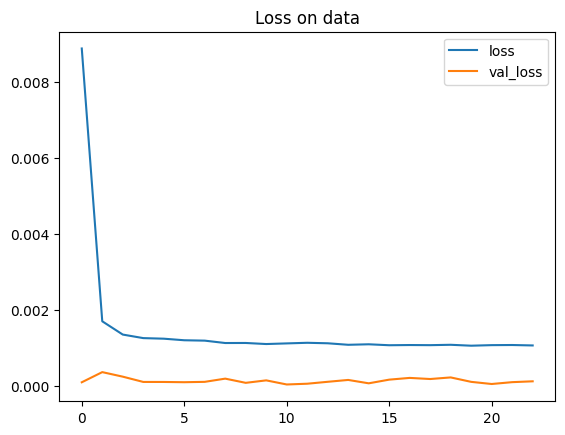

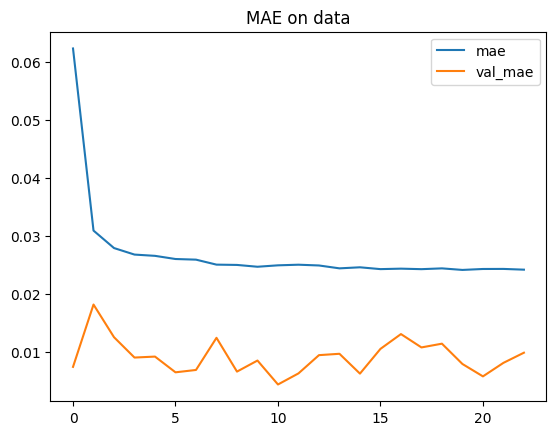

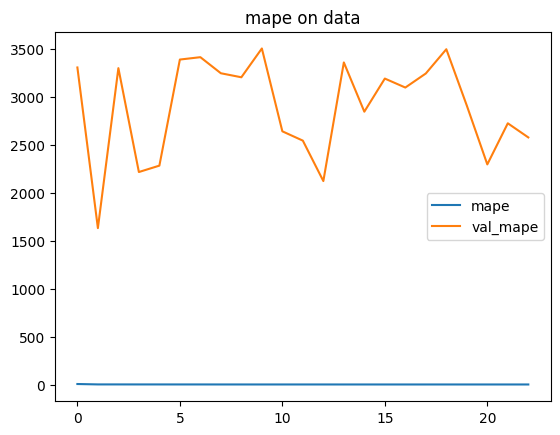

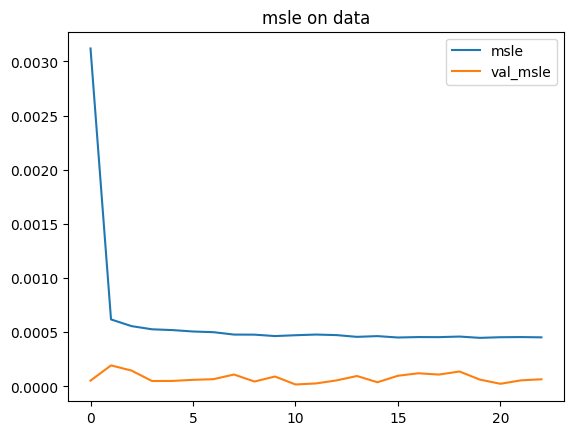

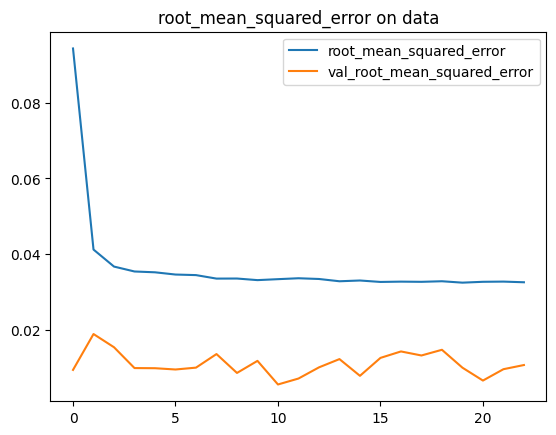

In [22]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

plt.title("MAE on data")
plt.plot(r.history['mae'], label="mae")
plt.plot(r.history['val_mae'], label="val_mae")
plt.legend()
plt.show()

plt.title("mape on data")
plt.plot(r.history['mape'], label="mape")
plt.plot(r.history['val_mape'], label="val_mape")
plt.legend()
plt.show()

plt.title("msle on data")
plt.plot(r.history['msle'], label="msle")
plt.plot(r.history['val_msle'], label="val_msle")
plt.legend()
plt.show()

plt.title("root_mean_squared_error on data")
plt.plot(r.history['root_mean_squared_error'], label="root_mean_squared_error")
plt.plot(r.history['val_root_mean_squared_error'], label="val_root_mean_squared_error")
plt.legend()
plt.show()




In [23]:
best_model = load_model(m_label + 'lstm_best.keras')


In [26]:
y_pred = best_model.predict(X_test)

11/11 [==============================] - 2s 53ms/step


In [31]:
print(y_pred.shape)

(330, 5)


In [33]:
print(inverse_transform_data(scaled_y=y_test), " comparing to ", inverse_transform_data(scaled_y=y_pred))

(None, array([[1.35382, 1.35405, 1.355  , 1.35438, 1.35432],
       [1.35405, 1.355  , 1.35438, 1.35432, 1.35071],
       [1.355  , 1.35438, 1.35432, 1.35071, 1.34903],
       ...,
       [1.33867, 1.33801, 1.33887, 1.3399 , 1.34021],
       [1.33801, 1.33887, 1.3399 , 1.34021, 1.34015],
       [1.33887, 1.3399 , 1.34021, 1.34015, 1.34019]]))  comparing to  (None, array([[1.351884 , 1.3519434, 1.3520848, 1.3517829, 1.3518162],
       [1.3512676, 1.3513267, 1.3514686, 1.3511654, 1.3511987],
       [1.3509374, 1.3509964, 1.3511387, 1.3508348, 1.3508681],
       ...,
       [1.3365673, 1.3366233, 1.3367802, 1.3364441, 1.3364775],
       [1.3353945, 1.3354504, 1.3356084, 1.3352698, 1.3353032],
       [1.3352273, 1.335283 , 1.3354411, 1.3351021, 1.3351356]],
      dtype=float32))


In [29]:
print("R^2 value for ", m_label)
print(r2_score(y_test, y_pred))

R^2 value for  GeneratedGBPUSD 
0.4060373426943434


In [ ]:




plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual Close Price', color='blue')
plt.plot(y_pred[:, 0], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()
